In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import json

plt.rcParams["figure.figsize"] = (20, 20)

In [3]:
with open("ret.json") as file:
    obj = json.loads(file.read())

In [4]:
graph = nx.Graph()
for name in obj["d1"].keys():
    for item in obj["d1"][name]:
        graph.add_edge(name, item)

for name in obj["d2"].keys():
    for item in obj["d2"][name]:
        graph.add_edge(name, item)

for name in obj["d3"].keys():
    for item in obj["d3"][name]:
        graph.add_edge(name, item)

In [5]:
pos = nx.spring_layout(graph)

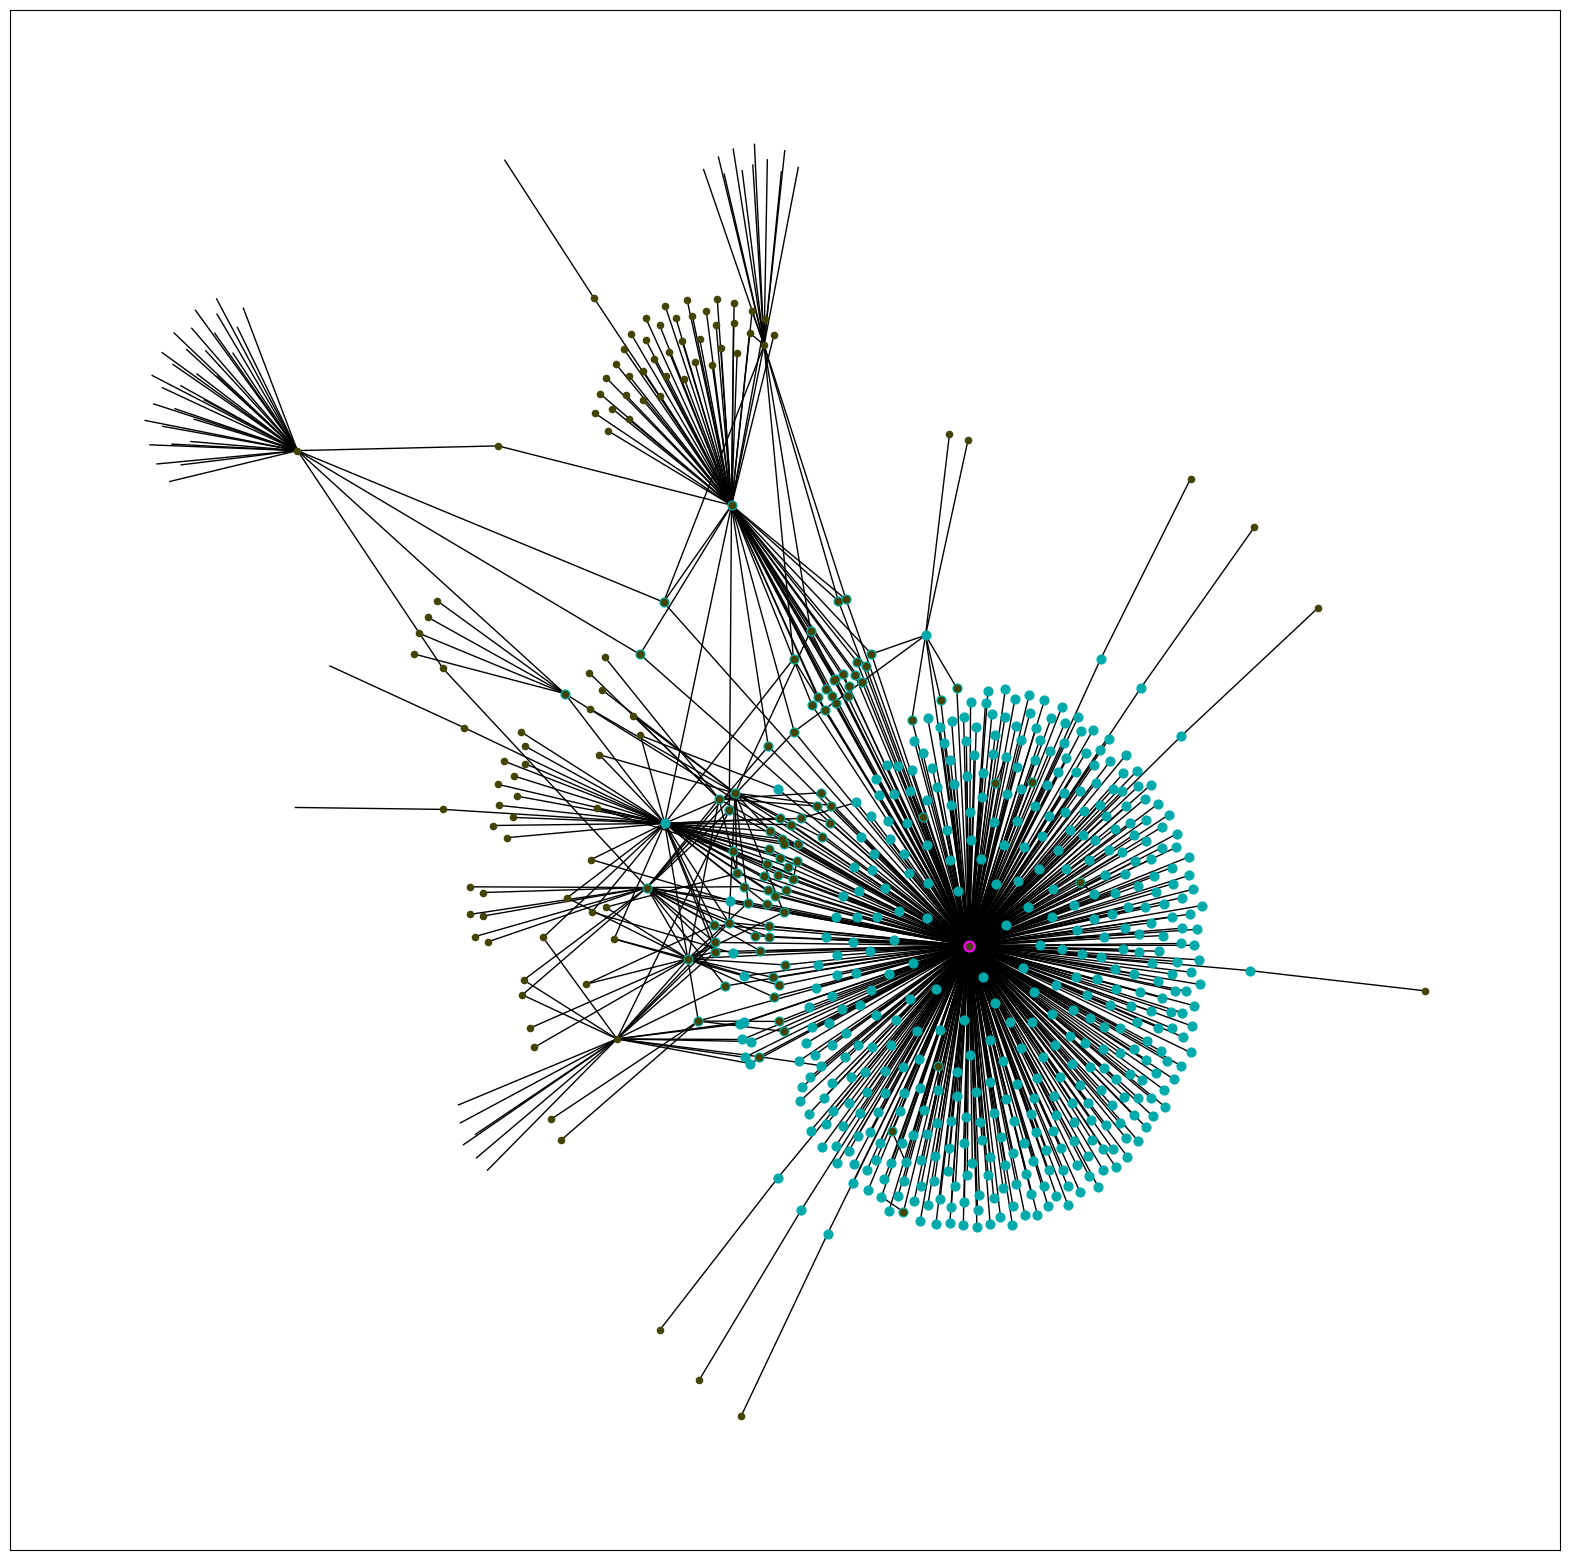

In [6]:
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_nodes(graph, pos, obj["d1"].keys(), node_size=60, node_color="#FF00FF")
nx.draw_networkx_nodes(graph, pos, obj["d2"].keys(), node_size=40, node_color="#00AAAA")
nx.draw_networkx_nodes(graph, pos, obj["d3"].keys(), node_size=20, node_color="#444400")

In [7]:
d2_nodes = list(filter(lambda i: len(obj["d2"][i]), obj["d2"]))
d3_nodes = list(filter(lambda i: len(obj["d3"][i]), obj["d3"]))

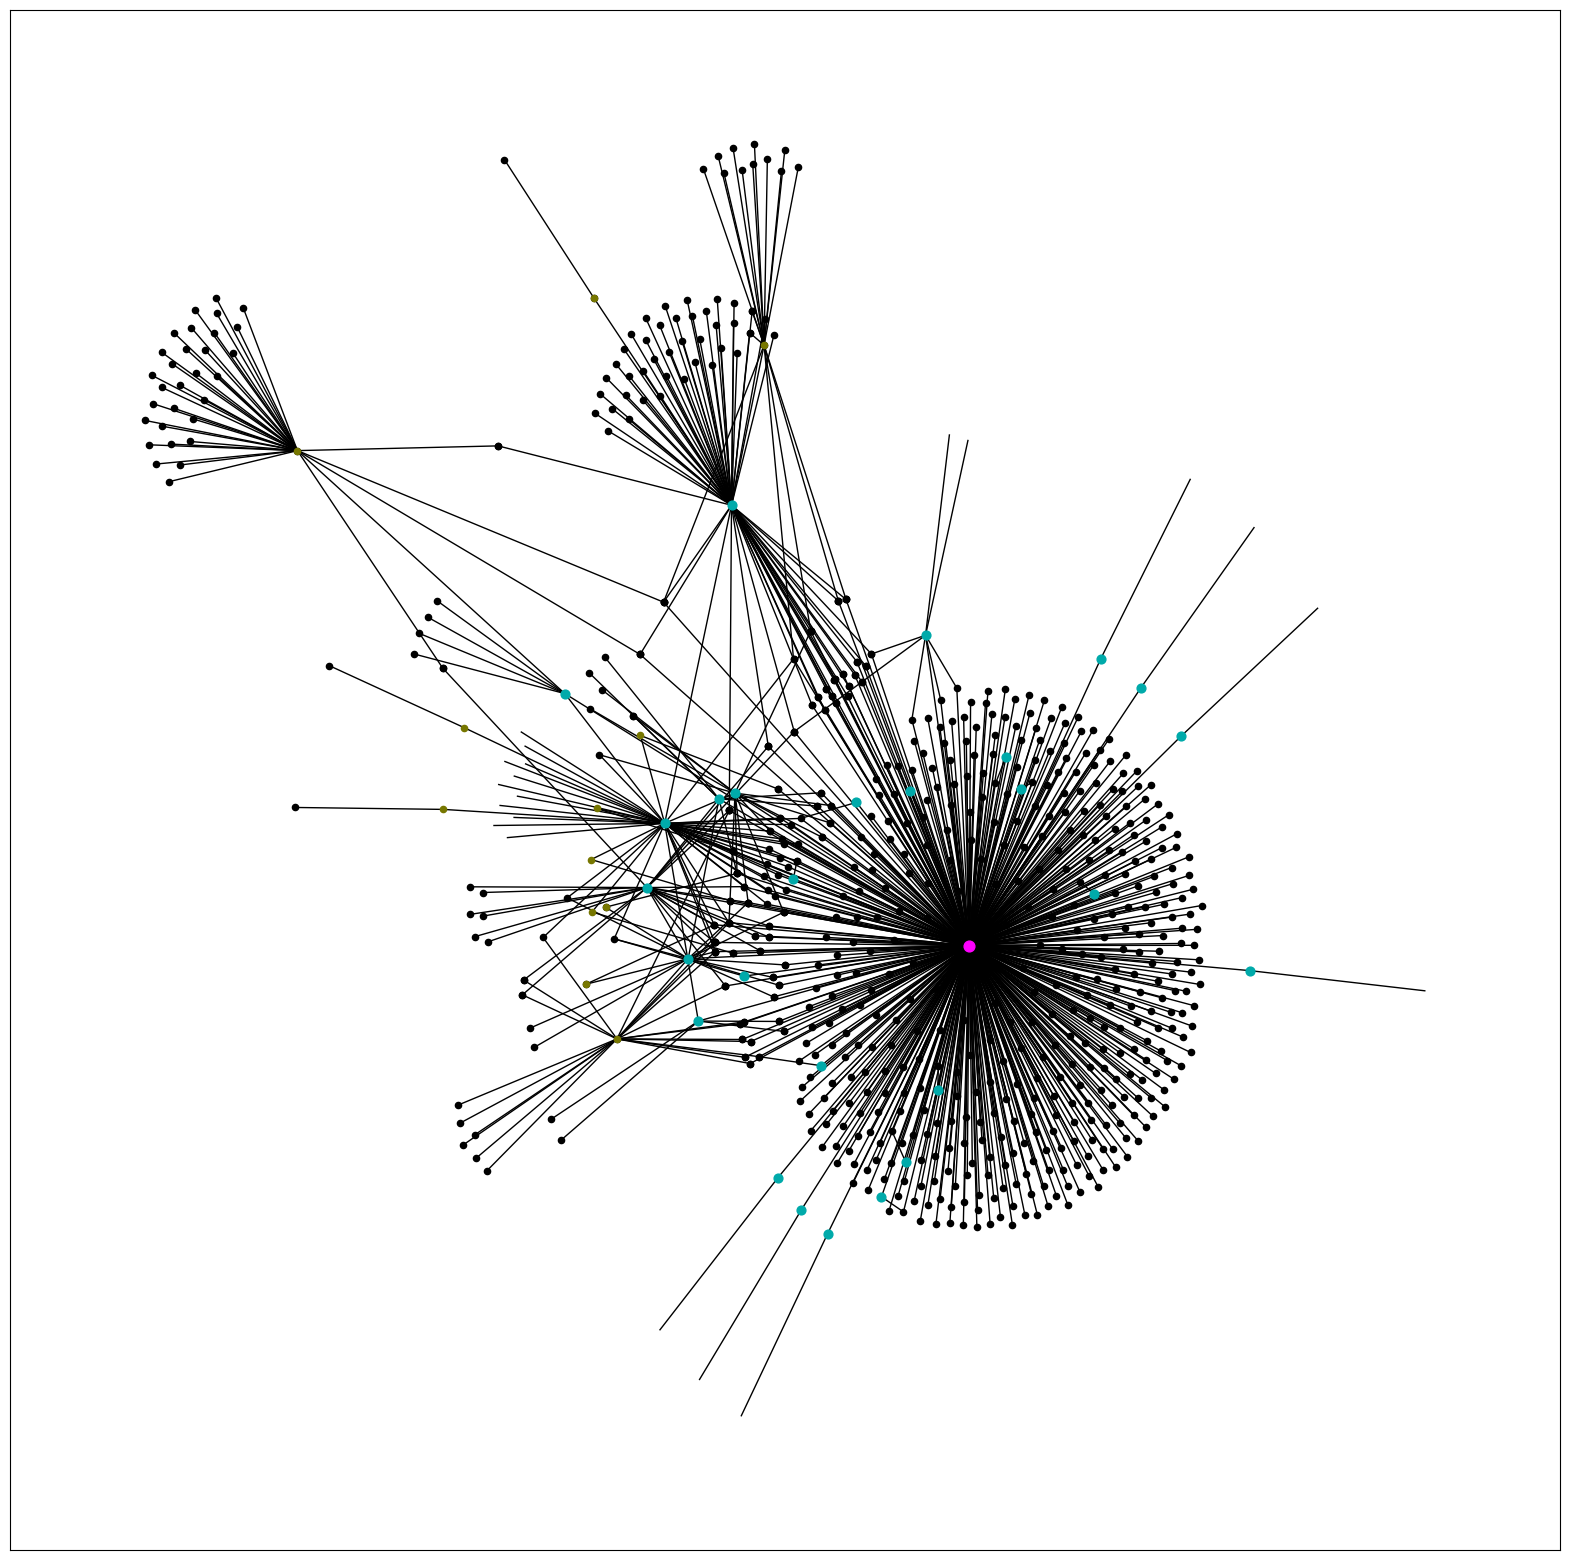

In [8]:
nx.draw_networkx_edges(graph, pos)
rest = []
for i in obj["d3"].values():
    for j in i:
        rest.append(j)
nx.draw_networkx_nodes(graph, pos, rest, node_size=20, node_color="#000")
nx.draw_networkx_nodes(graph, pos, d3_nodes, node_size=20, node_color="#777700")
nx.draw_networkx_nodes(graph, pos, d2_nodes, node_size=40, node_color="#00AAAA")
nx.draw_networkx_nodes(graph, pos, obj["d1"].keys(), node_size=60, node_color="#FF00FF")

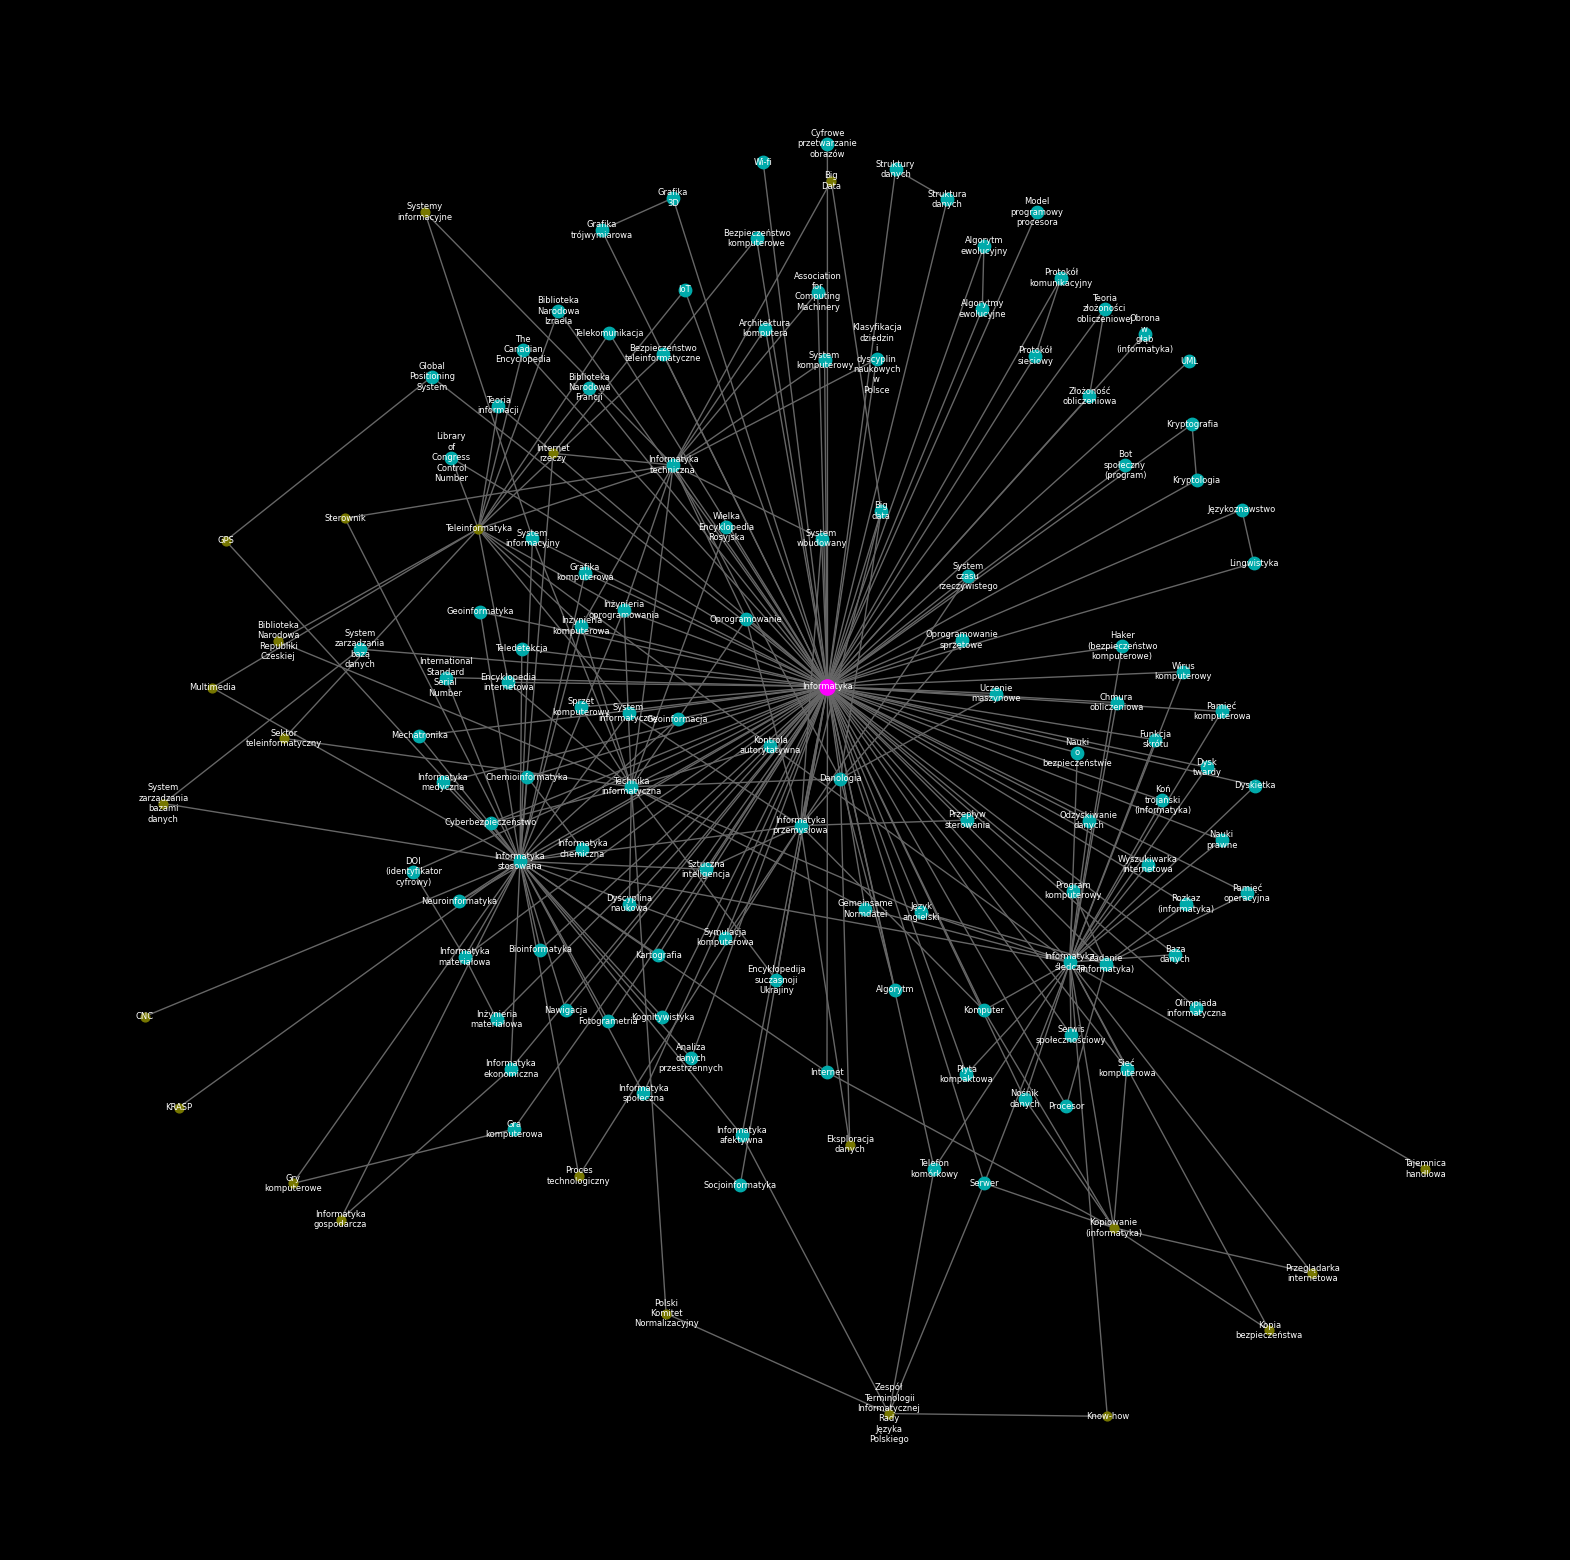

In [9]:
nodes = list(graph.nodes())
for node in nodes:
    if len(list(graph.neighbors(node))) == 1:
        graph.remove_node(node)

pos = nx.spring_layout(graph)
cmap = {
    "d1": set(),
    "d2": set(),
    "d3": set()
}
labels = {}

for node in graph.nodes:
    if node in obj["d1"].keys():
        cmap["d1"].add(node)
    elif node in obj["d2"].keys():
        cmap["d2"].add(node)
    else:
        cmap["d3"].add(node)
    
    labels[node] = node.replace(" ", "\n")

fig, ax = plt.subplots()
nx.draw_networkx_edges(graph, pos, edge_color="#666")
nx.draw_networkx_nodes(graph, pos, cmap["d3"], node_size=40, node_color="#777700")
nx.draw_networkx_nodes(graph, pos, cmap["d2"], node_size=80, node_color="#00AAAA")
nx.draw_networkx_nodes(graph, pos, cmap["d1"], node_size=120, node_color="#FF00FF")
_ = nx.draw_networkx_labels(graph, pos, font_size=6, font_color="#FFF", labels=labels)
fig.set_facecolor("#000")
ax.set_facecolor("#000")
plt.savefig("graph.pdf")

In [10]:
len(graph.nodes)

139

| Nazwa wielkości | co znaczy w moim grafie?
| --------------- | ------------------------
| Wierzchołek | artykuł na wikipedii
| Krawędź | połączenie między artykułem
| Gęstość | jak bardzo powiązane są ze sobą wszystkie artykuły w danej kategorii
| średnia długość ścieżki | ile trzeba kliknięć aby przejść do dowolnego innego artykułu
| średnica grafu | maksymalna ilość kliknięć pomiędzy dwoma artykułami
| stopień wierzchołka | ile innych artykułów nawiązuje do tego artykułu
| średni stopień wierzchołka | jak średnio w kategorii nawiązują do siebie tematy
| pośrednictwo | ile tras do innych artykułów przechodzi przez główny artykuł
| przegub | artykuł łączący dane podtematy w kategorii


## Gęstość

In [12]:
import numpy as np
E = len(graph.edges)
N = len(graph.nodes)
gestosc = (2 * E)/(N * (N - 1)) 
print(np.log10(gestosc))

-1.5300774554670602


In [13]:
mean_sohrtest_path = nx.average_shortest_path_length(graph)
print(mean_sohrtest_path)

2.205609425503076


In [14]:
max_len = 0
for nodeA in graph.nodes:
    for nodeB in graph.nodes:
        if (length := nx.shortest_path_length(graph, nodeA, nodeB)) > max_len:
            max_len = length
print(max_len)


4


In [18]:
degree = [len(list(nx.neighbors(graph, node))) for node in graph.nodes]
print(np.mean(degree))

4.071942446043166
